** Scenario: ** You are contracted by a Westeros software developer with a
Health and Wellness app looking to break into the Essos market. Based
on the provided data set your objective is to advise the client on the
following:

1. Who are the current market leaders in the Health and Wellness category and why are they successful? HINT: what metrics support your findings?
2. What market segments should your client target? The client is interested in opportunities presented in targeting based on location, current app usage behaviors, phone brand, and other demographic information available. HINT: do not limit yourself to counts and histograms.
3. The client is interested in partnering with apps outside the Health and Wellness space to drive cross promotion. Where are the biggest opportunities? Please create some short bullet points to support the recommendation in both data science and business contexts.

** Guidelines: **

1. The response should include a write-up and your code:

    a. Please write up your findings as if you were going to present your findings and recommendations to a client.
    
    b. Your code should be sufficient to justify and reproduce your findings. Your code should be well commented and flow logically (include dead ends, technical notes, etc.)  A junior team member should be able to understand the choices you make.
    
2. Feel free to make high level assumptions but be sure to explain them.

3. The response should not take too long. There is no hard deadline but we are not looking for a thesis level response; quick and dirty results are good (but sloppy is not).

4. The response code should be in R, Python or Spark (any dialect).

5. Please do not make this challenge or your response public.

6. Cite any work or code that influences your response.

7. Please do not spend more than 6 hours on this project

# Data and Setup

In [3]:
import pandas as pd
import numpy as np
import sqlite3

# Import visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [4]:
# Import dataset
app = pd.read_csv("app_event_category.csv", dtype = {'event_id': np.str, 'app_id': np.str})
event = pd.read_csv('events.csv',dtype={'device_id': np.str,'event_id': np.str})
user = pd.read_csv("gender_age_brand.csv",dtype = {'device_id': np.str})

In [5]:
# Create SQL database for easy query
# only run once then comment out
# The following is to create the sql database to store the 3 csv files. 

#connex = sqlite3.connect("database.db")  # Opens file if exists, else creates file
#cur = connex.cursor()  # This object lets us actually send messages to our DB and receive results

#app.to_sql(name="app", con=connex, if_exists="append", index=False) 

#event.to_sql(name="event", con=connex, if_exists="append", index=False) 

#user.to_sql(name="user", con=connex, if_exists="append", index=False) 

In [6]:
# locate the SQL database 
# create function to read the database
db = 'database.db'

def run_query(sql):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(sql, conn)


** 1. Who are the current market leaders in the Health and Wellness category and why are they successful? HINT: what metrics support your findings? **

a. Define current market leaders in Health and Wellness: The ones with the highest active unique users

The metrics I use to determine market leaders are: 
1. They have the most active usage
2. They have the most unique users, that's the unique devices that have the app installed

In [7]:
# Find the app_id with highest active counts: 
# app_category = 'Health and Wellness'
# is_active = 1 to make sure the app is currently active
# is_installed = 1 to make sure the app is currently being installed

sql = '''
    SELECT 
        app_category, 
        app_id,
        sum(is_active),
        count(distinct device_id)
    from app
    inner join event 
    on app.event_id = event.event_id
    where app_category = 'Health and Wellness' and 
          is_installed = 1 and 
          is_active = 1
    group by 
        app_category, 
        app_id
    order by 
        count(distinct device_id) desc;
'''

print(sql)


    SELECT 
        app_category, 
        app_id,
        sum(is_active),
        count(distinct device_id)
    from app
    inner join event 
    on app.event_id = event.event_id
    where app_category = 'Health and Wellness' and 
          is_installed = 1 and 
          is_active = 1
    group by 
        app_category, 
        app_id
    order by 
        count(distinct device_id) desc;



In [8]:
# Show the current top 10 market leaders in Health and Wellness
run_query(sql).head(10)

,app_category,app_id,sum(is_active),count(distinct device_id)
0,Health and Wellness,1088227414300337900,39943,5356
1,Health and Wellness,3683147815759994238,42951,4687
2,Health and Wellness,6868430133575209713,33814,2686
3,Health and Wellness,-1633887856876571208,31330,2243
4,Health and Wellness,-974457023668610292,23821,1743
5,Health and Wellness,5909705644131785817,27706,1568
6,Health and Wellness,6666573790957269996,13107,1119
7,Health and Wellness,-653184325010919369,5482,1067
8,Health and Wellness,-4986139885405704,25904,980
9,Health and Wellness,-3507529970483852351,9762,965


** 2.What market segments should your client target? The client is interested in opportunities presented in targeting based on location, current app usage behaviors, phone brand, and other demographic information available. HINT: do not limit yourself to counts and histograms. ** 

For Health and Wellness app category, check the followings to see what market segments like to use Health and Wellness app: 

** a. Location: For users have Health and Wellness app installed, where are they located?**
- Checking the Health and Wellness Apps unique user usage by location below, we saw that China has the most active unique users in using Health and Wellness apps. 
- There are some dots in the middel of the map, with longitute = 0 and latitute = 0. I think those are the users who don't want to share their location. Based on the volume, it's very small. 
- Still conclude that China has the most active uniuqe users in using Health and Wellness app.

In [9]:
# Get the health and wellness unique users data
# Check where they are located
sql = '''
    SELECT distinct 
        device_id, 
        longitude,
        latitude
    from event
    inner join app 
    on event.event_id = app.event_id
    where
        app_category = 'Health and Wellness' and 
        is_active = 1 and 
        is_installed = 1;
'''

print(sql)


    SELECT distinct 
        device_id, 
        longitude,
        latitude
    from event
    inner join app 
    on event.event_id = app.event_id
    where
        app_category = 'Health and Wellness' and 
        is_active = 1 and 
        is_installed = 1;



In [10]:
Health_event = run_query(sql)

In [11]:
# get the max and min longitude and latitude for plotting Health and Wellness app distribution 
print("Maximum longitude in the data is: ",Health_event.longitude.max())
print("Minimum longitude in the data is: ",Health_event.longitude.min())
print("Maximum latitude in the data is: ",Health_event.latitude.max())
print("Maximum latitude in the data is: ",Health_event.latitude.min())

Maximum longitude in the data is:  139.77
Minimum longitude in the data is:  -180.0
Maximum latitude in the data is:  52.33
Maximum latitude in the data is:  -0.25


/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


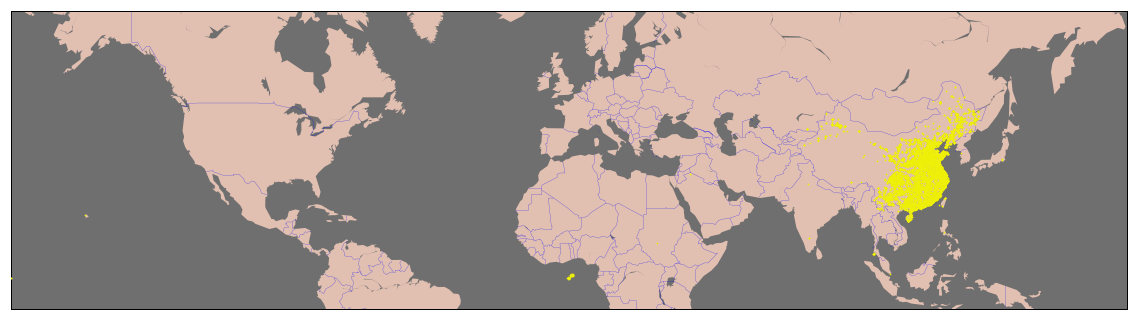

In [12]:
# Set up plot
plt.figure(1, figsize=(20,8))

# Set up the World Map
m1 = Basemap(projection='merc',
             llcrnrlat=-10,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#e1bfb1',lake_color='#6f6f6f') # peach land, grey lakes
m1.drawmapboundary(fill_color='#6f6f6f')                # grey background
m1.drawcountries(linewidth=0.2, color="b")              # thin line for country borders

# Plot the data
mxy = m1(Health_event["longitude"].tolist(), Health_event["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#eef009", lw=0, alpha=1, zorder=5) # yellow for the position marker

plt.show()

** Current App Usage Behaviors for Health and Wellness Apps: **
- Which month they use more often?
- Which day they use more often? 
- What time they use more often? 

In [13]:
# Get the health and wellness device data
# Check current health and wellness usage behaviors
sql = '''
    SELECT 
        app_category,
        device_id, 
        timestamp
    from app 
    inner join event 
    on event.event_id = app.event_id
    where
        app_category = 'Health and Wellness' and 
        is_active = 1 and 
        is_installed = 1;
'''

print(sql)


    SELECT 
        app_category,
        device_id, 
        timestamp
    from app 
    inner join event 
    on event.event_id = app.event_id
    where
        app_category = 'Health and Wellness' and 
        is_active = 1 and 
        is_installed = 1;



In [14]:
device = run_query(sql)

In [15]:
# take a look at the data
device.head()

,app_category,device_id,timestamp
0,Health and Wellness,-6401643145415154744,2016-05-01 00:54:12
1,Health and Wellness,1476664663289716375,2016-05-01 00:27:21
2,Health and Wellness,5990807147117726237,2016-05-01 00:15:13
3,Health and Wellness,7166563712658305181,2016-05-01 00:31:40
4,Health and Wellness,-3449419341168524142,2016-05-01 00:25:41


In [16]:
# check the device dataset info
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487247 entries, 0 to 487246
Data columns (total 3 columns):
app_category    487247 non-null object
device_id       487247 non-null object
timestamp       487247 non-null object
dtypes: object(3)
memory usage: 11.2+ MB


We see that timestamp is a string. We need to convert it to datetime format

In [17]:
from dateutil.parser import parse

# test for one timestamp
#date_text = device.timestamp[0]
#dt = parse(date_text)
#print(dt)

In [18]:
device['timestamp_2'] = device.timestamp.apply(lambda x: parse(x))

In [177]:
type(device)

pandas.core.frame.DataFrame

In [19]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487247 entries, 0 to 487246
Data columns (total 4 columns):
app_category    487247 non-null object
device_id       487247 non-null object
timestamp       487247 non-null object
timestamp_2     487247 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 14.9+ MB


In [20]:
device.head()

,app_category,device_id,timestamp,timestamp_2
0,Health and Wellness,-6401643145415154744,2016-05-01 00:54:12,2016-05-01 00:54:12
1,Health and Wellness,1476664663289716375,2016-05-01 00:27:21,2016-05-01 00:27:21
2,Health and Wellness,5990807147117726237,2016-05-01 00:15:13,2016-05-01 00:15:13
3,Health and Wellness,7166563712658305181,2016-05-01 00:31:40,2016-05-01 00:31:40
4,Health and Wellness,-3449419341168524142,2016-05-01 00:25:41,2016-05-01 00:25:41


/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


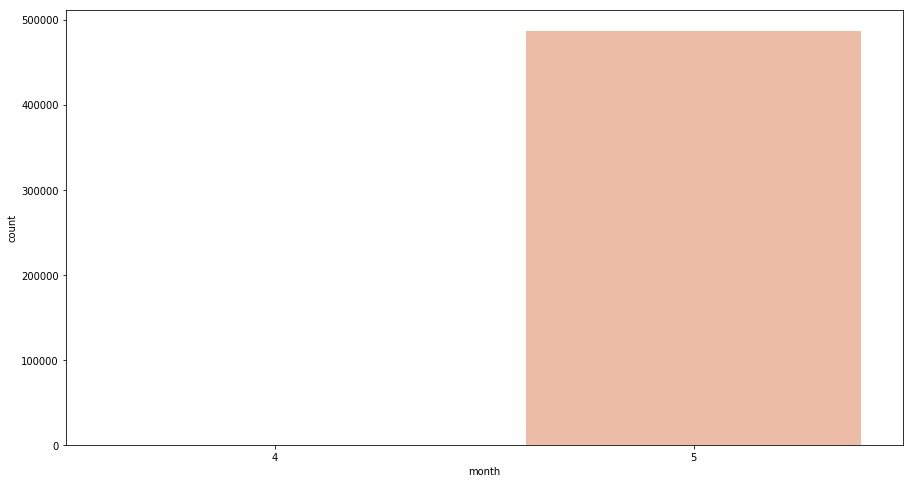

In [22]:
import calendar
device['month'] = device.timestamp_2.apply(lambda x: x.month)
plt.figure(1, figsize=(15,8))
ax = sns.countplot(x="month", palette='coolwarm',data=device)

In [23]:
device.month.value_counts()

5    487132
4       115
Name: month, dtype: int64

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


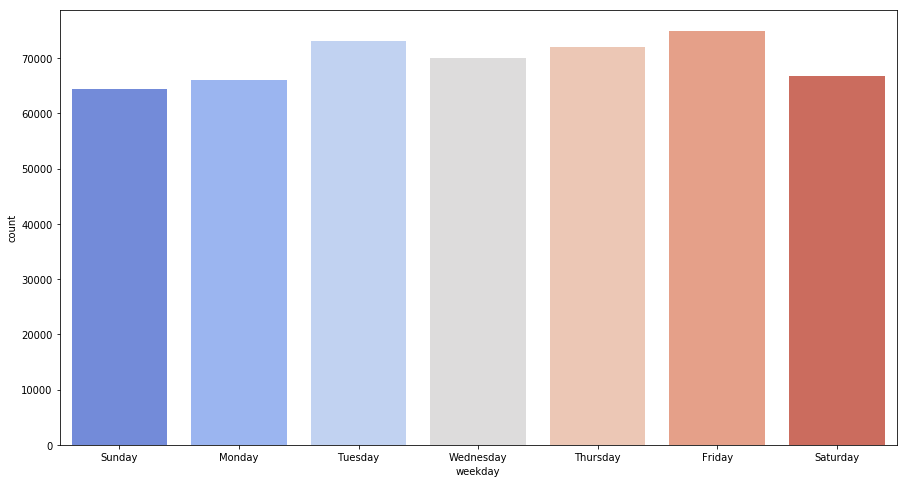

In [24]:
device['weekday'] = device.timestamp_2.apply(lambda x: calendar.day_name[x.weekday()])
plt.figure(1, figsize=(15,8))
ax = sns.countplot(x="weekday",palette='coolwarm', data=device)

In [25]:
# value counts per day
device.weekday.value_counts()

Friday       74952
Tuesday      73049
Thursday     72004
Wednesday    70026
Saturday     66731
Monday       66034
Sunday       64451
Name: weekday, dtype: int64

In [26]:
# average usage per day
device.weekday.value_counts().mean()

69606.71428571429

We can see that Friday has the highest usage for Health and Wellness apps, Tuesday is the next, with Sunday being the least usage on Health and Wellness apps. The average daily usage is 69,606.7.

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


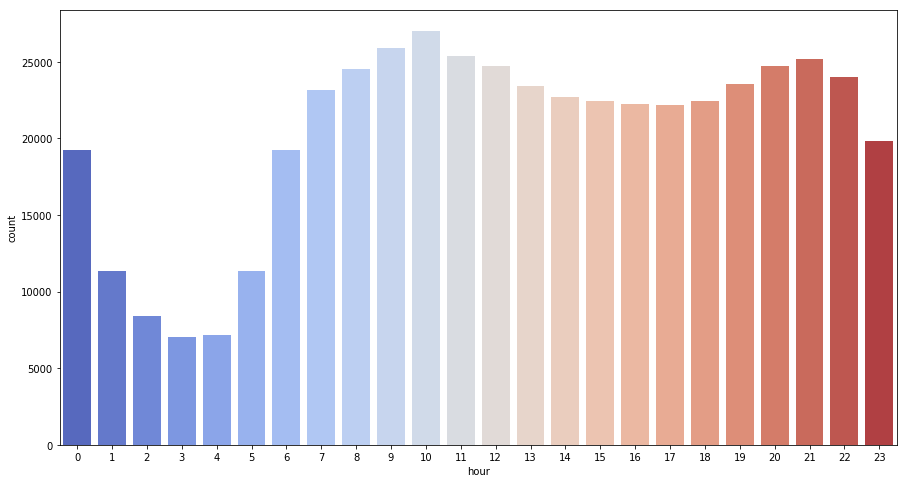

In [27]:
plt.figure(1, figsize=(15,8))
device['hour'] = device.timestamp_2.apply(lambda x: x.hour)
ax = sns.countplot(x='hour', palette='coolwarm',data=device)

In [28]:
# value counts per hour usage
device.hour.value_counts()

10    27033
9     25926
11    25384
21    25179
20    24736
12    24709
8     24526
22    24016
19    23563
13    23393
7     23145
14    22710
15    22435
18    22411
16    22258
17    22169
23    19844
6     19260
0     19223
5     11366
1     11346
2      8423
4      7162
3      7030
Name: hour, dtype: int64

In [31]:
# average usage per hour
device.hour.value_counts().mean()

20301.958333333332

** Phone Brand:** Which are the top phone brand for Health and Wellness apps users?


In [70]:
# Get the health and wellness gender, age, brand data
# Check current health and wellness usage behaviors
sql = '''
    SELECT 
        app_category,
        timestamp,
        longitude,
        latitude,
        user.*
        
    from app 
    inner join event on event.event_id = app.event_id
    inner join user on event.device_id = user.device_id
    where
        app_category = 'Health and Wellness' and 
        is_active = 1 and 
        is_installed = 1;
'''

print(sql)


    SELECT 
        app_category,
        timestamp,
        longitude,
        latitude,
        user.*
        
    from app 
    inner join event on event.event_id = app.event_id
    inner join user on event.device_id = user.device_id
    where
        app_category = 'Health and Wellness' and 
        is_active = 1 and 
        is_installed = 1;



In [71]:
user_demo = run_query(sql)

In [72]:
# take a look at the dataset
user_demo.head()

,app_category,timestamp,longitude,latitude,device_id,gender,age,group,phone_brand
0,Health and Wellness,2016-05-01 00:27:21,0.00,0.00,1476664663289716375,M,19,M22-,apple
1,Health and Wellness,2016-05-01 00:31:40,117.96,28.47,7166563712658305181,M,60,M39+,apple
2,Health and Wellness,2016-05-01 00:25:41,0.00,0.00,-3449419341168524142,M,28,M27-28,apple
3,Health and Wellness,2016-05-01 00:33:14,113.37,28.25,-4713356591613805069,M,25,M23-26,apple
4,Health and Wellness,2016-05-01 00:33:14,113.37,28.25,-4713356591613805069,M,25,M23-26,apple


In [78]:
# check the top 10 phone brand in using Health and Wellness apps
user_demo.phone_brand.value_counts().head(10)

apple      139287
samsung     27682
lenovo       6788
ccmc         2358
lshi         1638
nubia        1370
oneplus       869
hammer        706
yuxin         573
hisense       490
Name: phone_brand, dtype: int64

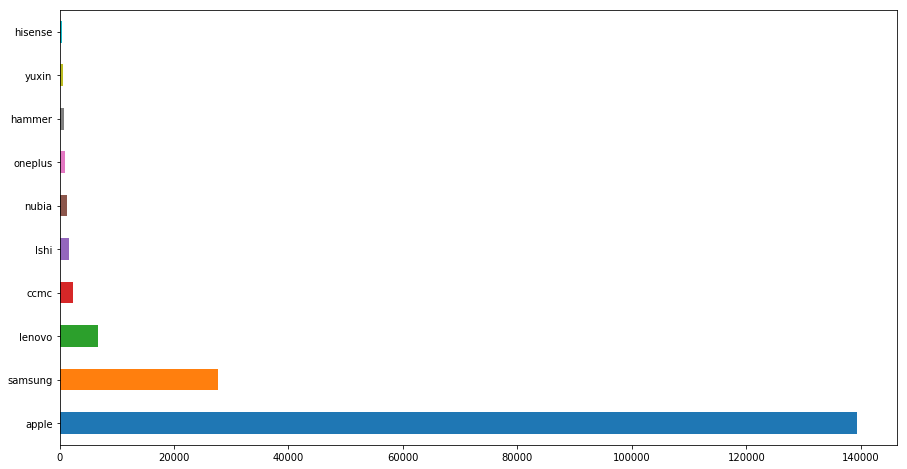

In [94]:
plt.figure(1, figsize=(15,8))
user_demo['phone_brand'].value_counts().head(10).plot(kind='barh')

** Age: ** What age of users use the Health and Wellness more?

In [96]:
# average age using the Health and Wellness apps
user_demo.age.mean()

35.602278804282584

In [103]:
user_demo[user_demo['gender'] == 'F'].age.mean()

36.10626963239664

In [104]:
user_demo[user_demo['gender'] == 'M'].age.mean()

35.427852620135454

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


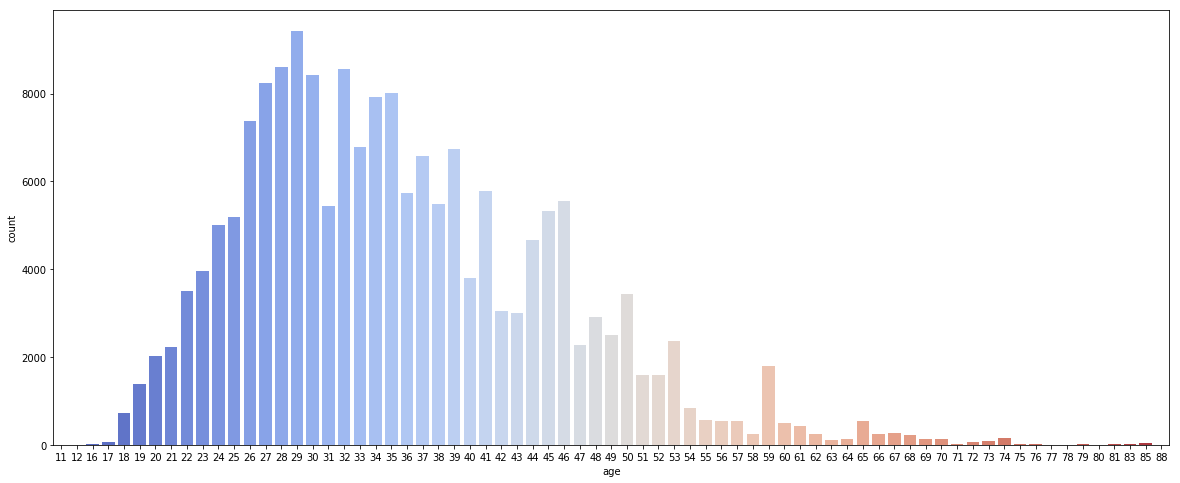

In [139]:
# plot all the age distribution
plt.figure(1, figsize=(20,8))
ax = sns.countplot(x='age', palette='coolwarm',data=user_demo)

In [141]:
user_demo.age.describe()

count    183254.000000
mean         35.602279
std           9.810917
min          11.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          88.000000
Name: age, dtype: float64

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


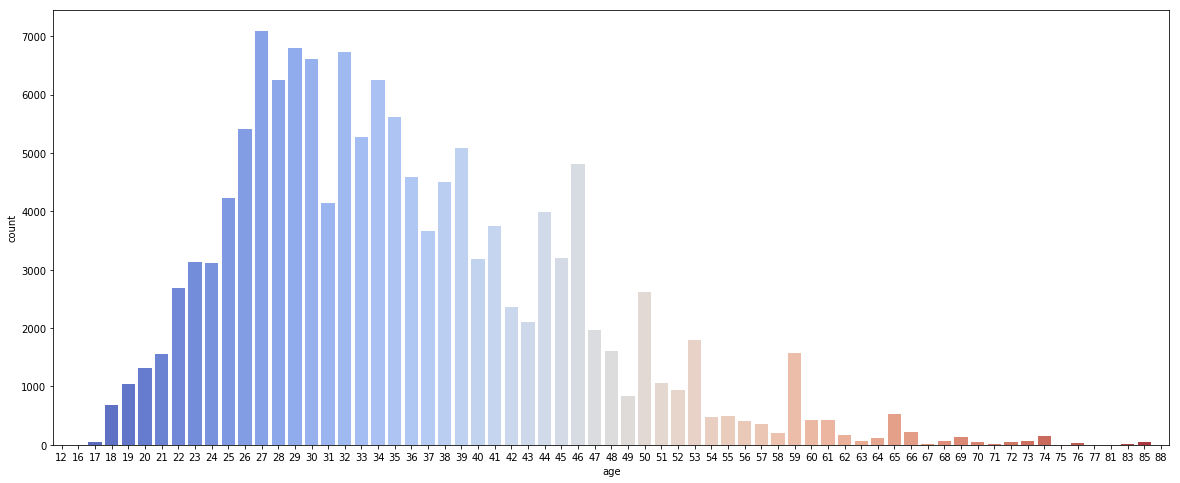

In [140]:
# plot male the age distribution
plt.figure(1, figsize=(20,8))
ax = sns.countplot(x='age', palette='coolwarm',data=user_demo[user_demo['gender']=='M'])

In [142]:
user_demo[user_demo['gender']=='M'].age.describe()

count    136138.000000
mean         35.427853
std           9.756809
min          12.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          88.000000
Name: age, dtype: float64

In [145]:
# top 10 male age group in using health and wellness app
user_demo[user_demo['gender']=='M'].age.value_counts().head(10)

27    7098
29    6805
32    6724
30    6613
34    6255
28    6246
35    5623
26    5409
33    5268
39    5083
Name: age, dtype: int64

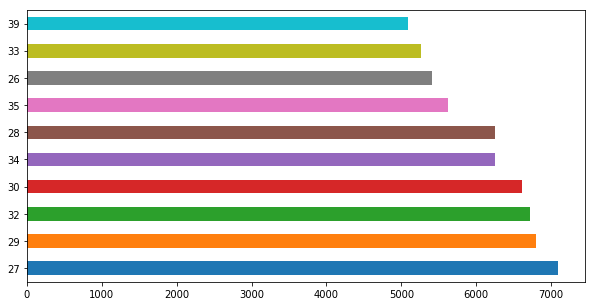

In [147]:
plt.figure(1, figsize=(10,5))
user_demo[user_demo['gender']=='M'].age.value_counts().head(10).plot(kind='barh')

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


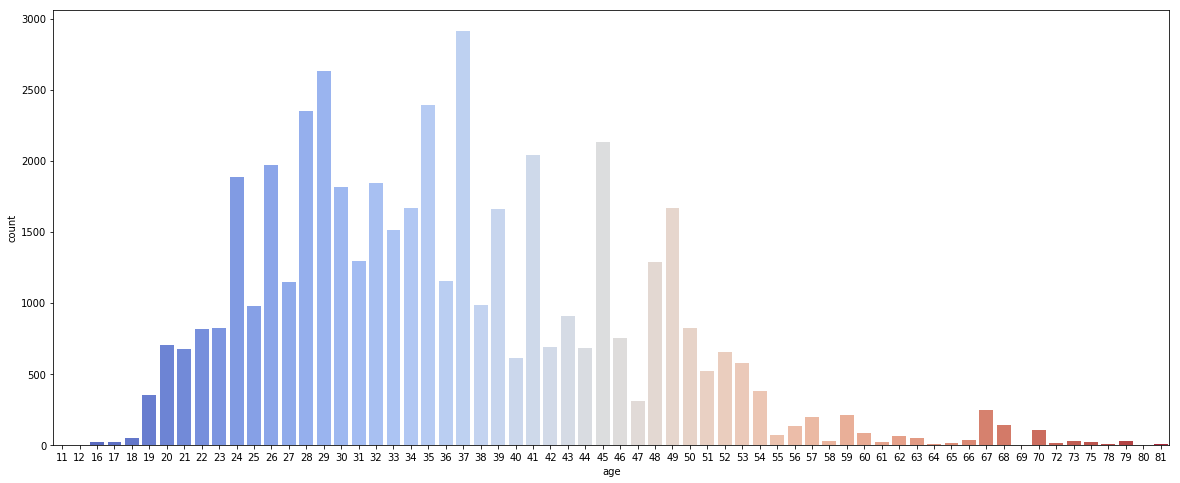

In [138]:
# plot female the age distribution
plt.figure(1, figsize=(20,8))
ax = sns.countplot(x='age', palette='coolwarm',data=user_demo[user_demo['gender']=='F'])

In [143]:
user_demo[user_demo['gender']=='F'].age.describe()

count    47116.000000
mean        36.106270
std          9.948543
min         11.000000
25%         29.000000
50%         35.000000
75%         43.000000
max         81.000000
Name: age, dtype: float64

In [148]:
# top 10 female age group in using health and wellness app
user_demo[user_demo['gender']=='F'].age.value_counts().head(10)

37    2915
29    2632
35    2393
28    2351
45    2128
41    2040
26    1968
24    1885
32    1844
30    1815
Name: age, dtype: int64

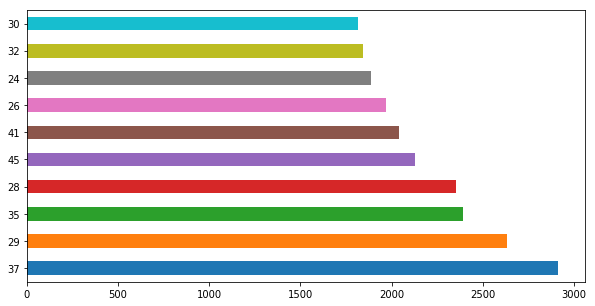

In [149]:
plt.figure(1, figsize=(10,5))
user_demo[user_demo['gender']=='F'].age.value_counts().head(10).plot(kind='barh')

In [90]:
# top 10 age using the Health and Wellness apps
user_demo.age.value_counts().head(10)

29    9437
28    8597
32    8568
30    8428
27    8241
35    8016
34    7922
26    7377
33    6780
39    6741
Name: age, dtype: int64

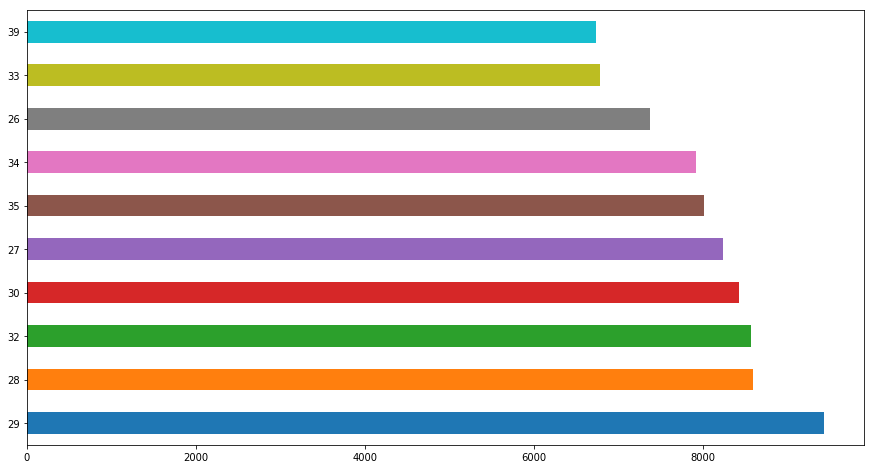

In [102]:
plt.figure(1, figsize=(15,8))
user_demo['age'].value_counts().head(10).plot(kind='barh')

** Gender: ** Check gender distribution

In [130]:
# gender distribution in using the Health and Wellness apps
user_demo.gender.value_counts()

M    136138
F     47116
Name: gender, dtype: int64

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


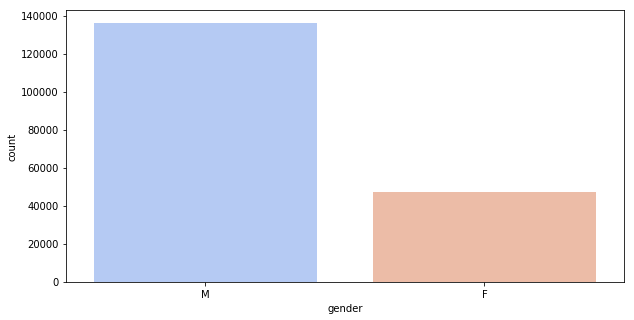

In [129]:
# plot gender distribution
plt.figure(1, figsize=(10,5))
ax = sns.countplot(x='gender', palette='coolwarm',data=user_demo)

** Gender Age Group:** Check gender and age combined group distribution

In [133]:
# male and age combined distribution
user_demo[user_demo['gender'] =='M'].group.value_counts()

M39+      45399
M32-38    36607
M29-31    17559
M23-26    15873
M27-28    13344
M22-       7356
Name: group, dtype: int64

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


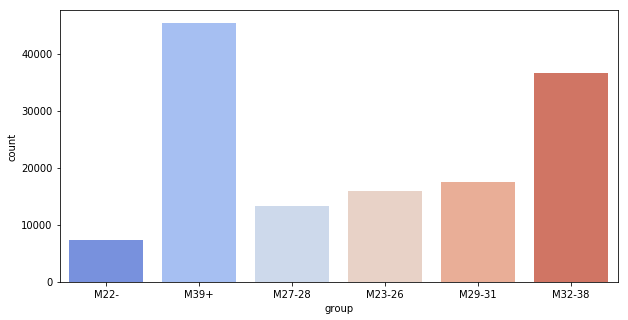

In [134]:
plt.figure(1, figsize=(10,5))
ax = sns.countplot(x='group', palette='coolwarm',data=user_demo[user_demo['gender'] =='M'])

In [135]:
# female and age combined distribution
user_demo[user_demo['gender'] =='F'].group.value_counts()

F33-42    15621
F43+      12148
F29-32     7582
F24-26     4828
F27-28     3494
F23-       3443
Name: group, dtype: int64

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


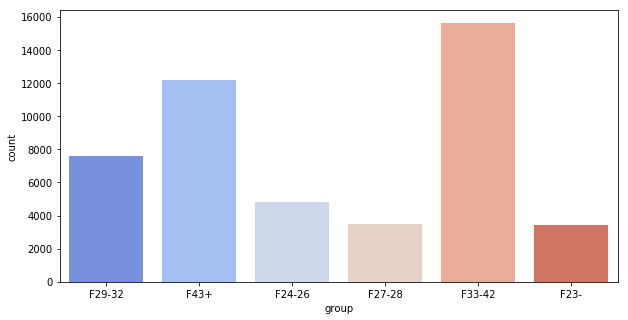

In [136]:
plt.figure(1, figsize=(10,5))
ax = sns.countplot(x='group', palette='coolwarm',data=user_demo[user_demo['gender'] =='F'])

** 3. The client is interested in partnering with apps outside the Health and Wellness space to drive cross promotion. Where are the biggest opportunities? Please create some short bullet points to support the recommendation in both data science and business contexts.**

Since we've figured out which market segments are the health and wellness app users belong to in step 2. We can use those market segments to find what other app categories those market segments population like to use. Then we can partner with those category to drive cross promotion.


In [192]:
# combine app, event, and user data together. 
sql = '''
    SELECT 
        app_category,
        app_id,
        timestamp,
        longitude,
        latitude,
        user.*
        
    from app 
    inner join event on event.event_id = app.event_id
    inner join user on event.device_id = user.device_id
    where
        is_active = 1 and 
        is_installed = 1;
'''

print(sql)


    SELECT 
        app_category,
        app_id,
        timestamp,
        longitude,
        latitude,
        user.*
        
    from app 
    inner join event on event.event_id = app.event_id
    inner join user on event.device_id = user.device_id
    where
        is_active = 1 and 
        is_installed = 1;



In [193]:
promotion = run_query(sql)

In [194]:
# check the dataset
promotion.head()

,app_category,app_id,timestamp,longitude,latitude,device_id,gender,age,group,phone_brand
0,Game,-7377004479023402858,2016-05-01 00:27:21,0.0,0.0,1476664663289716375,M,19,M22-,apple
1,Game,6284164581582112235,2016-05-01 00:27:21,0.0,0.0,1476664663289716375,M,19,M22-,apple
2,Game,5927333115845830913,2016-05-01 00:27:21,0.0,0.0,1476664663289716375,M,19,M22-,apple
3,Game,3433289601737013244,2016-05-01 00:27:21,0.0,0.0,1476664663289716375,M,19,M22-,apple
4,online malls,-3467200097934864127,2016-05-01 00:27:21,0.0,0.0,1476664663289716375,M,19,M22-,apple


In [195]:
# no missing data
promotion.isnull().any()

app_category    False
app_id          False
timestamp       False
longitude       False
latitude        False
device_id       False
gender          False
age             False
group           False
phone_brand     False
dtype: bool

** a. which are the top app_category outside Health and Wellness in China? **

In [196]:
# Get the longitute and latitute range for China Region

# Lat-long coorditates for cities in China are in range: 
# Latitude from 18.24306 to 52.33333 and longitude from 75.98951 to 134.28917.
# website: http://latitudelongitude.org/cn/
c_lon_min, c_lon_max = 75, 135
c_lat_min, c_lat_max = 18, 53

In [197]:
# get the china data
china = promotion[(promotion['longitude'] <= 135) &
(promotion['longitude'] >= 75) &
(promotion['latitude'] <= 53) & 
(promotion['latitude'] >= 18)]

In [198]:
china['timestamp_2'] = china.timestamp.apply(lambda x: parse(x))

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [199]:
china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700995 entries, 15 to 4802705
Data columns (total 11 columns):
app_category    object
app_id          object
timestamp       object
longitude       float64
latitude        float64
device_id       object
gender          object
age             int64
group           object
phone_brand     object
timestamp_2     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 155.7+ MB


In [201]:
# create weekday and hour category
china['weekday'] = china.timestamp_2.apply(lambda x: calendar.day_name[x.weekday()])
china['hour'] = china.timestamp_2.apply(lambda x: x.hour)

/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Jiaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
china.isnull().any()

app_category    False
app_id          False
timestamp       False
longitude       False
latitude        False
device_id       False
gender          False
age             False
group           False
phone_brand     False
timestamp_2     False
weekday         False
hour            False
dtype: bool

In [203]:
china.head()

,app_category,app_id,timestamp,longitude,latitude,device_id,gender,age,group,phone_brand,timestamp_2,weekday,hour
15,Game,6284164581582112235,2016-05-01 00:31:40,117.96,28.47,7166563712658305181,M,60,M39+,apple,2016-05-01 00:31:40,Sunday,0
16,Game,3433289601737013244,2016-05-01 00:31:40,117.96,28.47,7166563712658305181,M,60,M39+,apple,2016-05-01 00:31:40,Sunday,0
17,Game,8693964245073640147,2016-05-01 00:31:40,117.96,28.47,7166563712658305181,M,60,M39+,apple,2016-05-01 00:31:40,Sunday,0
18,Health and Wellness,-9129109839652417461,2016-05-01 00:31:40,117.96,28.47,7166563712658305181,M,60,M39+,apple,2016-05-01 00:31:40,Sunday,0
19,Game,5099453940784075687,2016-05-01 00:31:40,117.96,28.47,7166563712658305181,M,60,M39+,apple,2016-05-01 00:31:40,Sunday,0


In [204]:
china.app_category.value_counts().head(5)

Game                   1343873
Food and Lifestyle      105334
Health and Wellness      61098
weibo                    26748
video                    18090
Name: app_category, dtype: int64

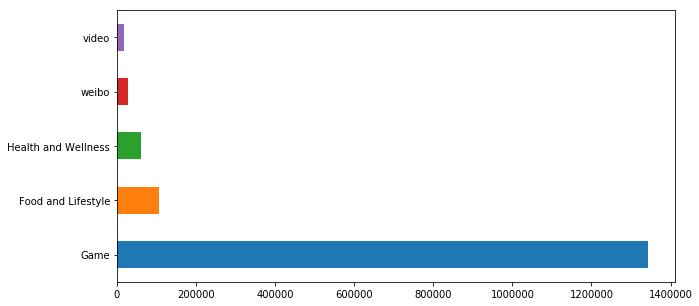

In [205]:
plt.figure(1, figsize=(10,5))
china.app_category.value_counts().head(5).plot(kind='barh')

In [206]:
# filer down to Game category 
game = china[china['app_category'] == 'Game']

In [208]:
# weekday games
game_wday = game[(game['weekday'] == 'Monday')|
            (game['weekday'] == 'Tuesday')|
            (game['weekday'] == 'Wednesday')|
            (game['weekday'] == 'Thursday')|
            (game['weekday'] == 'Friday')]

In [210]:
game_wday.head()

,app_category,app_id,timestamp,longitude,latitude,device_id,gender,age,group,phone_brand,timestamp_2,weekday,hour
185,Game,-5696330257194422214,2016-05-02 00:11:29,113.76,23.04,3107259735454171724,M,24,M23-26,samsung,2016-05-02 00:11:29,Monday,0
186,Game,5927333115845830913,2016-05-02 00:11:29,113.76,23.04,3107259735454171724,M,24,M23-26,samsung,2016-05-02 00:11:29,Monday,0
187,Game,8693964245073640147,2016-05-02 00:11:29,113.76,23.04,3107259735454171724,M,24,M23-26,samsung,2016-05-02 00:11:29,Monday,0
188,Game,6666573792468194779,2016-05-02 00:11:29,113.76,23.04,3107259735454171724,M,24,M23-26,samsung,2016-05-02 00:11:29,Monday,0
189,Game,-8504475857937456387,2016-05-02 00:11:29,113.76,23.04,3107259735454171724,M,24,M23-26,samsung,2016-05-02 00:11:29,Monday,0


In [212]:
# china, game app, weekday data, apple, samsung brand 
df = game_wday[(game_wday['phone_brand'] == 'apple') | (game_wday['phone_brand'] == 'samsung')]

In [222]:
len(df)

936388

In [216]:
# hour from 9-12am, 8-9pm
df2 = df[((df['hour'] >= 9) & (df['hour'] <= 12)) | ((df['hour'] >= 20) & (df['hour'] <= 21))]

In [224]:
len(df2)

298537

In [218]:
# age from 25 to 40
df3 = df2[(df2['age'] >=25 ) & (df2['age'] <=40)]

In [227]:
df3.app_id.value_counts().head(10)

8693964245073640147     18695
5927333115845830913     12286
3433289601737013244     10890
4348659952760821294      8914
-5368809411346728624     7710
6284164581582112235      7672
628020936226491308       7345
8948670408023620661      7111
7348340405200054701      5778
7167114343576723123      4353
Name: app_id, dtype: int64

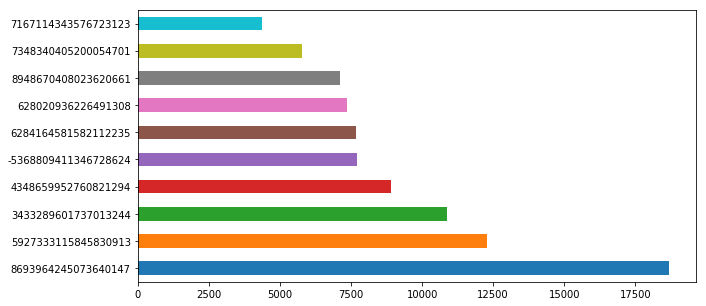

In [228]:
plt.figure(1, figsize=(10,5))
df3.app_id.value_counts().head(10).plot(kind='barh')

In [230]:
# weekend games
game_wkend = game[(game['weekday'] == 'Saturday')|
            (game['weekday'] == 'Sunday')]

In [232]:
# china, game app, weekends data, apple, samsung brand 
df = game_wkend[(game_wkend['phone_brand'] == 'apple') | (game_wkend['phone_brand'] == 'samsung')]

In [233]:
# younger age: 25 - 40
df2 = df[((df['age'] >= 25) & (df['age'] <= 40))]

In [234]:
# male prefer
df3 = df2[df2['gender'] =='M']

In [236]:
df3.app_id.value_counts().head(10)

8693964245073640147     15323
5927333115845830913     10044
3433289601737013244      9052
4348659952760821294      7548
-5368809411346728624     6189
6284164581582112235      6045
8948670408023620661      5943
628020936226491308       5827
7348340405200054701      4410
7167114343576723123      3231
Name: app_id, dtype: int64

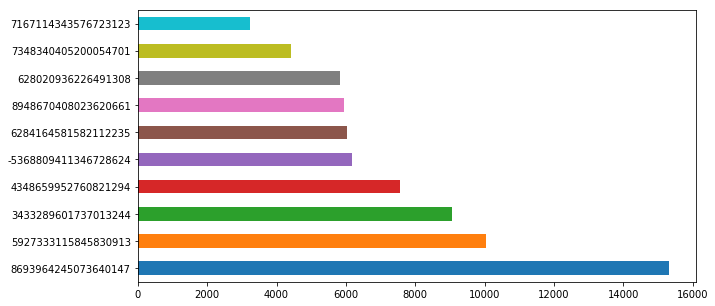

In [237]:
plt.figure(1, figsize=(10,5))
df3.app_id.value_counts().head(10).plot(kind='barh')

In [243]:
# filer down to Game category 
life = china[china['app_category'] == 'Food and Lifestyle']
# weekend games
life_wday = life[(life['weekday'] == 'Monday')|
            (life['weekday'] == 'Tuesday')|
            (life['weekday'] == 'Wednesday')|
            (life['weekday'] == 'Thursday')|
            (life['weekday'] == 'Friday')]
# china, game app, weekends data, apple, samsung brand 
df = life_wday[(life_wday['phone_brand'] == 'apple') | (life_wday['phone_brand'] == 'samsung')]
df2 = df[((df['hour'] >= 9) & (df['hour'] <= 12)) | ((df['hour'] >= 20) & (df['hour'] <= 21))]
# younger age: 25 - 40
df2 = df2[((df2['age'] >= 25) & (df2['age'] <= 40))]

In [245]:
df3.app_id.value_counts().head(10)

8693964245073640147     15323
5927333115845830913     10044
3433289601737013244      9052
4348659952760821294      7548
-5368809411346728624     6189
6284164581582112235      6045
8948670408023620661      5943
628020936226491308       5827
7348340405200054701      4410
7167114343576723123      3231
Name: app_id, dtype: int64